In [125]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
import numpy as np
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import tensorflow.train 
np.random.seed(1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [282]:
dim= (100,100)
X=np.zeros((39,100,100,3))
for i in range(1,40):
    im = cv2.imread(str(i) + ".jpg")
    a = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
    X[i-1,:]=a
y=np.array([1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0])

In [283]:
y=y.reshape(y.shape[0],1)

In [284]:
y.shape

(39, 1)

In [285]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1)

In [286]:
Y_test.shape

(4, 1)

In [287]:
X_train=X_train/255   
X_test=X_test/255

onehotencoder = OneHotEncoder() 
Y_train = onehotencoder.fit_transform(Y_train).toarray() 
onehotencoder2 = OneHotEncoder() 
Y_test  = onehotencoder2.fit_transform(Y_test).toarray() 

C:\Users\sachj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sachj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [288]:
Y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [289]:
X_train.shape

(35, 100, 100, 3)

In [290]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(shape=[None, n_H0, n_W0, n_C0],dtype="float" )
    Y = tf.placeholder(shape=[None,n_y],dtype="float")
    ### END CODE HERE ###
    
    return X, Y

In [291]:
x_h,x_w,x_c,n_y=X.shape[1],X.shape[2],X.shape[3],Y.shape[1]
create_placeholders(x_h,x_w,x_c,n_y)

(<tf.Tensor 'Placeholder_15:0' shape=(?, 100, 100, 3) dtype=float32>,
 <tf.Tensor 'Placeholder_16:0' shape=(?, 2) dtype=float32>)

In [295]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Note that we will hard code the shape values in the function to make the grading simpler.
    Normally, functions should take values as inputs rather than hard coding.
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1",[4,4,3,8],initializer= tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2",[2,2,8,16],initializer= tf.contrib.layers.xavier_initializer(seed=0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [296]:
initialize_parameters()

{'W1': <tf.Variable 'W1:0' shape=(4, 4, 3, 8) dtype=float32_ref>,
 'W2': <tf.Variable 'W2:0' shape=(2, 2, 8, 16) dtype=float32_ref>}

In [392]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Note that for simplicity and grading purposes, we'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
  
    W1 = parameters['W1']
 
    W2 = parameters['W2']
    
    #print(W1)
    #print(W2)
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1,ksize=[1,8,8,1],strides=[1,8,8,1],padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2,ksize=[1,4,4,1],strides=[1,4,4,1],padding='SAME')
    # FLATTEN
    F = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    print("done")
    Z3 = tf.contrib.layers.fully_connected(F,2,activation_fn=None)
    print("done2")
    ### END CODE HERE ###

    return Z3

In [298]:
tf.reset_default_graph()
#Verify if forward propagation works
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(100, 100, 3, 2)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,100,100,3), Y: np.random.randn(2,2)})
    print("Z3 = \n" + str(a))
    print(a[0][0])

Z3 = 
[[ 3.6677785  -0.7941852 ]
 [ 3.3427157  -0.70049465]]
3.6677785


In [299]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples, 6)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
    ### END CODE HERE ###
    
    return cost

In [300]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(100, 100, 3, 2)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, feed_dict={X: np.random.randn(4,100,100,3), Y: np.random.randn(4,2)})
    print("cost = " + str(a))

cost = -0.30325222


In [301]:
Y_train.shape

(35, 2)

In [413]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0009,
          num_epochs = 100, minibatch_size = 2, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 100, 100, 3)
    Y_train -- test set, of shape (None, n_y = 2)
    X_test -- training set, of shape (None, 100, 100, 3)
    Y_test -- test set, of shape (None, n_y = 2)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0,n_W0,n_C0,n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X,parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3,Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            #minibatches = tf.train.random_mini_batches(X_train, Y_train, minibatch_size, seed)
            #minibatches=[[X_train,Y_train]]
            minibatches=1
            for minibatch in range(minibatches):

                # Select a minibatch
                (minibatch_X, minibatch_Y) = (X_train,Y_train)
                """
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost.
                # The feedict should contain a minibatch for (X,Y).
                """
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost],feed_dict={X:minibatch_X , Y:minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
        X_test_1= np.zeros((1,100,100,3))
        im = cv2.imread("test_image.jpg")
        a = cv2.resize(im, (100,100), interpolation=cv2.INTER_LINEAR)
        
        X_test_1[0]=a/255
        Y_test_1=np.array([1., 0.])
        Y_test_1=Y_test_1.reshape((1,2))
        test_accuracy_1 = accuracy.eval({X: X_test_1, Y: Y_test_1})     
        print(test_accuracy_1)
        return train_accuracy, test_accuracy, parameters

done
done2
Cost after epoch 0: 0.043637
Cost after epoch 5: 0.040052
Cost after epoch 10: 0.039617
Cost after epoch 15: 0.038844
Cost after epoch 20: 0.037676
Cost after epoch 25: 0.036893
Cost after epoch 30: 0.035931
Cost after epoch 35: 0.034986
Cost after epoch 40: 0.033978
Cost after epoch 45: 0.032889
Cost after epoch 50: 0.031703
Cost after epoch 55: 0.030479
Cost after epoch 60: 0.029193
Cost after epoch 65: 0.027878
Cost after epoch 70: 0.026521
Cost after epoch 75: 0.025109
Cost after epoch 80: 0.023653
Cost after epoch 85: 0.022182
Cost after epoch 90: 0.020672
Cost after epoch 95: 0.019138


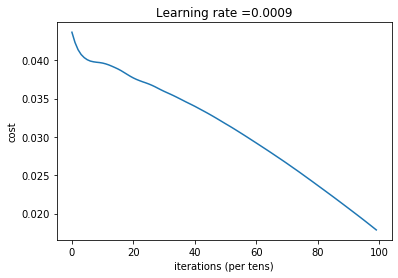

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.94285715
Test Accuracy: 1.0
1.0


In [414]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)